In [1]:
import pandas as pd
from sklearn.tree import export_graphviz
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets

In [2]:
wine = datasets.load_wine()
wine_dataset = pd.DataFrame(wine.data, columns = wine.feature_names)

# print the names of the 13 features
print("Features:", wine.feature_names, sep="\n")


# print the label type of wine(class_0, class_1, class_2)
print("\nLabels:", wine.target_names)

# print data(feature)shape
print("Shape:", wine_dataset.shape)
wine_dataset.head()

Features:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Labels: ['class_0' 'class_1' 'class_2']
Shape: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
le = LabelEncoder() # not need already numeric data

In [4]:
#split data set into train and test sets
train_x, test_x, train_y, test_y = train_test_split(wine.data, wine.target, test_size = 0.2, random_state = 2) # roll no 2 and 80%-20% split

In [5]:
#Create a Decision Tree Classifier (using Entropy)
DT = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 2) # roll no 2 ..less leaf nodes...might underfit

#Train the model using the training sets
final_model = DT.fit(train_x, train_y)

In [6]:
# Predict the classes of test data
prediction = DT.predict(test_x)
print("prediction:",prediction)
print(prediction.dtype)

prediction: [1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1]
int32


In [7]:
# Model Accuracy, how often is the classifier correct?
Accuracy = accuracy_score(test_y, prediction)
print("Accuracy:",Accuracy)

Accuracy: 0.3888888888888889


As expected, underfitting hase happend `to avoid this increase max_leaf_nodes`
    or else leave max_leaf_nodes as it is and use gini index instead of entropy to get better result

In [8]:
export_graphviz(DT,out_file='wine_tree.dot',feature_names=list(wine.feature_names),
               class_names=list(wine.target_names), filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'wine_tree.dot', '-o', 'wine_tree.png', '-Gdpi=600'], shell = True)

0

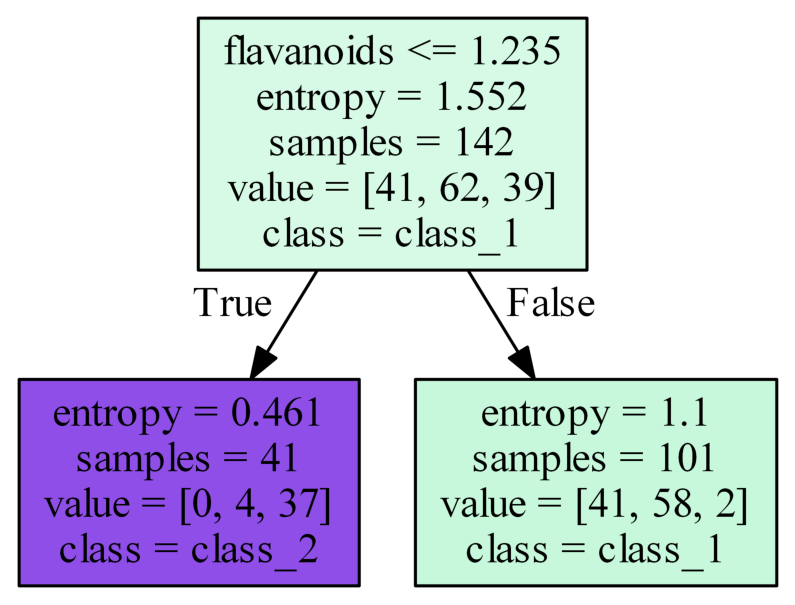

In [9]:
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('wine_tree.png'))
plt.axis('off')
plt.show()